# Exploring Github/Gitlab searches

Make sure the following dependecies are met:

```bash
pip install pandas==0.20.2
pip install pytrends==4.4.0
```

## Fetch the data from Google Trends

In [1]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-GB', tz=0)

keywords_list=["github", "gitlab"]
# timeframe_description='today 1-m'
timeframe_description='now 7-d'

pytrends.build_payload(keywords_list, cat=0, timeframe=timeframe_description, geo='', gprop='')
ghgl_df = pytrends.interest_over_time()

## Plot the timeseries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

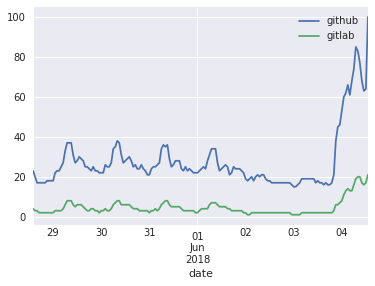

In [3]:
ghgl_df['timeline'] = ghgl_df.index
ghgl_df[['timeline', 'github', 'gitlab']].plot()

## Timeseries correlation

In [4]:
ghgl_corr = ghgl_df['github'].corr(other=ghgl_df['gitlab'])
print("Timeseries correlation:", ghgl_corr)

Timeseries correlation: 0.973171599739


[Text(0,0.5,'github/gitlab'), Text(0.5,0,'timeline')]

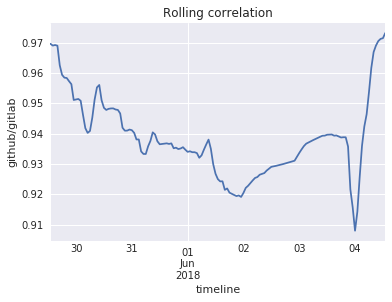

In [5]:
rolling_window='2h'
ax = ghgl_df['github'].rolling(rolling_window).corr(other=ghgl_df['gitlab'].rolling(rolling_window))[ghgl_df['timeline']>'2018-05-29 12:00:00'].plot(title="Rolling correlation")
ax.set(xlabel="timeline", ylabel="github/gitlab")

## Stock price correlation

In [7]:
# pip install pandas-datareader==0.6.0
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2018, 5, 29)
# end = datetime(2017, 5, 24)

msft_df = web.DataReader('MSFT', 'morningstar', start)['Close']
msft_df.head()

Symbol  Date      
MSFT    2018-05-29     98.01
        2018-05-30     98.95
        2018-05-31     98.84
        2018-06-01    100.79
Name: Close, dtype: float64